## 2. Merge Sort

### 2.1 Divide and Conquer

The divide and conquer consists of three steps:

1. Divide
    - If the input size if smaller than a certain threshold
        - Soolve the problem directly
    - Otherwise, divide the input data into two or more disjoint subsets


2. Conquer
    - Recursively solve the subproblems associated with the subsets
    

3. Combine
    - Take the solutions to the subproblems and merge them into a solution to the original problem
    
    
#### Using Divide-and-Counquer for Sorting

**Merge Sort**:

1. Divide:
    - If S has zero or one element, return S immediately
    - Otherwise, remove all the elements from S and put them into two sequences S1, and S2, each containing about half of the elements in S
    - S1 有前n//2 个元素，S2包含剩余元素

2. Conquer:
    - Recursively sort sequences S1 and S2
    
    
3. Combine:
    - Put back the elements into S by merging the sorted sequences S1 and S2 into a sorted sequence
    
<font color = 'red'>All the hard work is done after the recursive call</font>

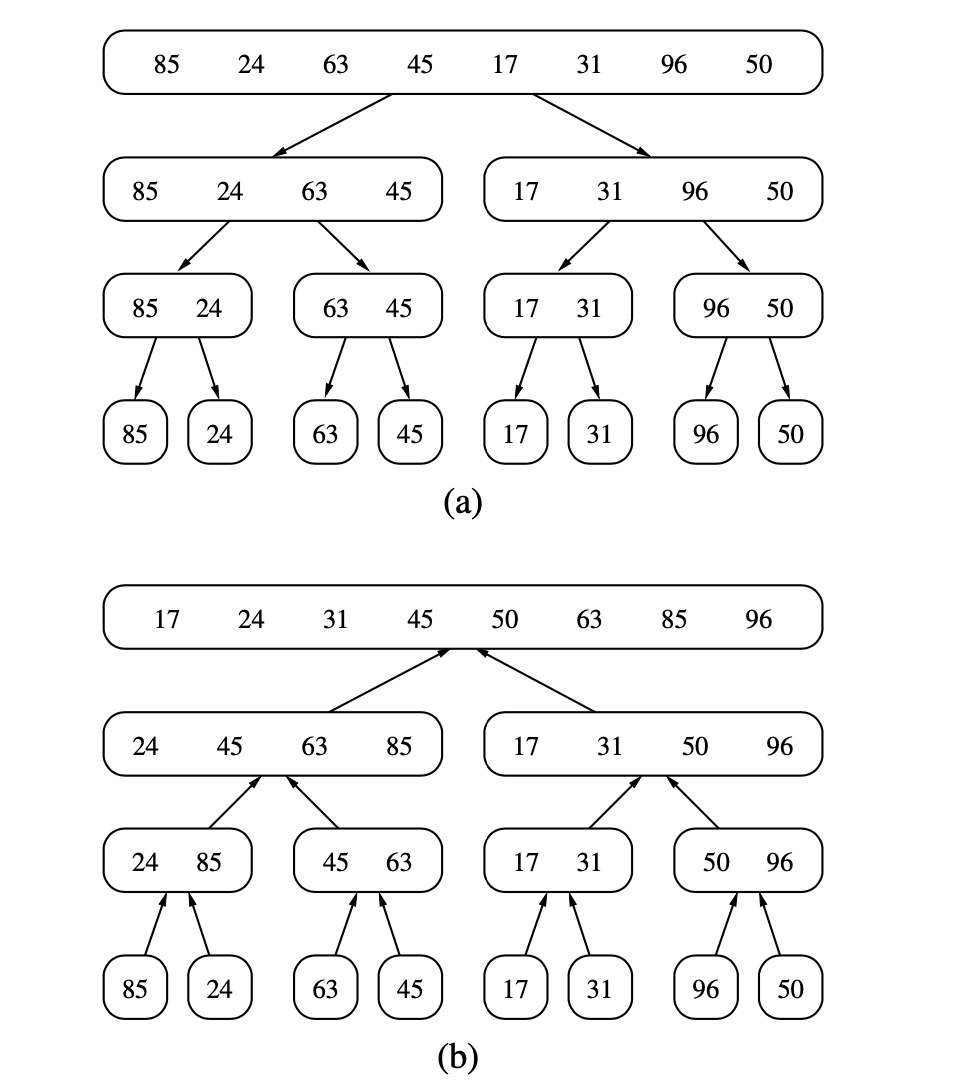


#### The merge-sort tree has height logn

### 2.2 Array-Based Implementation of Merge-Sort


In [1]:
def merge(S1, S2, S):
    '''
    merge two sorted python list s1 s2 into properly sized list s
    '''
    i = j = 0
    while i + j < len(S):
        if j == len(S2) or (i < len(S1) and S1[i] < S2[j]):
            S[i+j] = S1[i]
            i += 1
        else:
            S[i+j] = S2[j]
            j += 1
            
def merge_sort(S):
    '''
    Sort the element of Python list S using the merge-sort algorithm
    '''
    n = len(S)
    if n < 2:
        return
    mid = n // 2
    S1 = S[:mid]
    S2 = S[mid:]
    merge_sort(S1)
    merge_sort(S2)
    merge(S1, S2, S)

### 2.3 The Running Time of Merge-Sort

Time complexity:
    - O(nlogn)
    - 无论最好，最坏或平均，稳定性强
Space complexity:
    - O(n)
    - 需要一个与原数组相同长度的数组来辅助排序
    
评价：
    - 比较占用内存，但效率高且稳定

#### 复杂度分析

归并排序总时间 = 分解时间 + 子序列排好序时间 + 合并时间

无论序列中有多少数都是折中分解，所以分解时间是常数，可忽略不计

归并排序总时间 = 子序列排好序时间 + 合并时间

假设一个有n个数的序列的排序时间为T(n)，将n个数的序列，分为两个(n/2)的序列

则有：
    
    T(n) = 2 * T(n/2) + 合并时间

由于合并时，两个子序列已经组内排好序了，那么只需要一个if循环就可以组合成一个大的有序序列，所以时间复杂度为n

    T(n) = 2 * T(n/2) + n

同理，有：

    T(n/2) = 2 * T(n/4) + n/2
    T(n/4) = 2 * T(n/8) + n/4
    
可得：
    
    T(n) = 8 * T(n / 8) + 3n
    T(n) = n * T(1) + n * （层数-1）
    
有T(1) = 0, 得出

    T(n) = nlog(n)

### 2.5 Alternative Implementation of Merge-Sort

#### Sorting Linked Lists

In [2]:
def merge(S1, S2, S):
    '''
    Merge two sorted queue(LinkedQueue class) instances S1 and S2 into empty queue S
    '''
    while not S1.is_empty() and not S2.is_empty():
        if S1.first() < S2.first():
            S.enqueue(S1.dequeue())
        else:
            S.enqueue(S2.dequeue())
    while not S1.is_empty():
        S.enqueue(S1.dequeue())
    while not S2.is_empty():
        S.enqueue(S2.dequeue())
        
def merge_sort(S):
    '''
    Sort the element of queue S using the merge-sort algorithm
    '''
    n = len(S)
    if n < 2:
        return
    S1 = LinkedQueue()
    S2 = LinkedQueue()
    # move element to S1 and S2
    while len(S1) < n // 2:
        S1.enqueue(S.dequeue())
    while not S.is_empty():
        S2.enqueue(S.dequeue())
    merge_sort(S1)
    merge_sort(S2)
    merge(S1, S2, S)

#### Bottom-Up (Nonrecursive) Merge-Sort

Faster than recursive merge-sort in practice, as it avoids the extra overheads of recursive calls and temporary memory at each level.

Deploy a second array that stores the merged runs(swapping input and output arrays after each iteration)
    - To keep the space usage reasonable

In [8]:
import math

def merge(src, result, start, inc):
    '''
    Merge src[start:start+inc] and src[start+inc:start + 2*inc] 
    into result
    '''
    end1 = start + inc
    end2 = min(start + 2 * inc, len(src))
    # index into run1, run2, result
    x, y, z = start, start + inc, start
    while x < end1 and y < end2:
        if src[x] < src[y]:
            result[z] = src[x]
            x += 1
        else:
            result[z] = src[y]
            y += 1
        z += 1
    if x < end1:
        result[z:end2] = src[x:end1]
    elif y < end2:
        result[z:end2] = src[y:end2]
        
def merge_sort(S):
    n = len(S)
    logn = math.ceil(math.log(n,2))
    src, dest = S, [None] * n
    for i in (2 ** k for k in range(logn)):
        for j in range(0, n, 2 * i):
            merge(src, dest, j, i)
        # reverse roles of lists
        src, dest = dest, src
    if S is not src:
        S[0:n] = src[0:n]

## 3. Quick-Sort

#### High-Level Description of Quick-Sort:

1. Divide:
    - If S has at least two element, select a specific element x from S, which is called the pivot.
    - In common practice, choose the pivot x to be the last element in S
    - Remove all the elements from S and put them into three sequences:
        - L, storing the elements in S less than x
        - E, storing the elements in S equal to x
        - G, storing the elements in S greater than x


2. Conquer:
    - Recursively sort sequences L and G
   
   
3. Combine:
    - Put back the elements into S in order by L, E, G
    

<font color = 'red'>All the hard work is done before the recursive call</font>

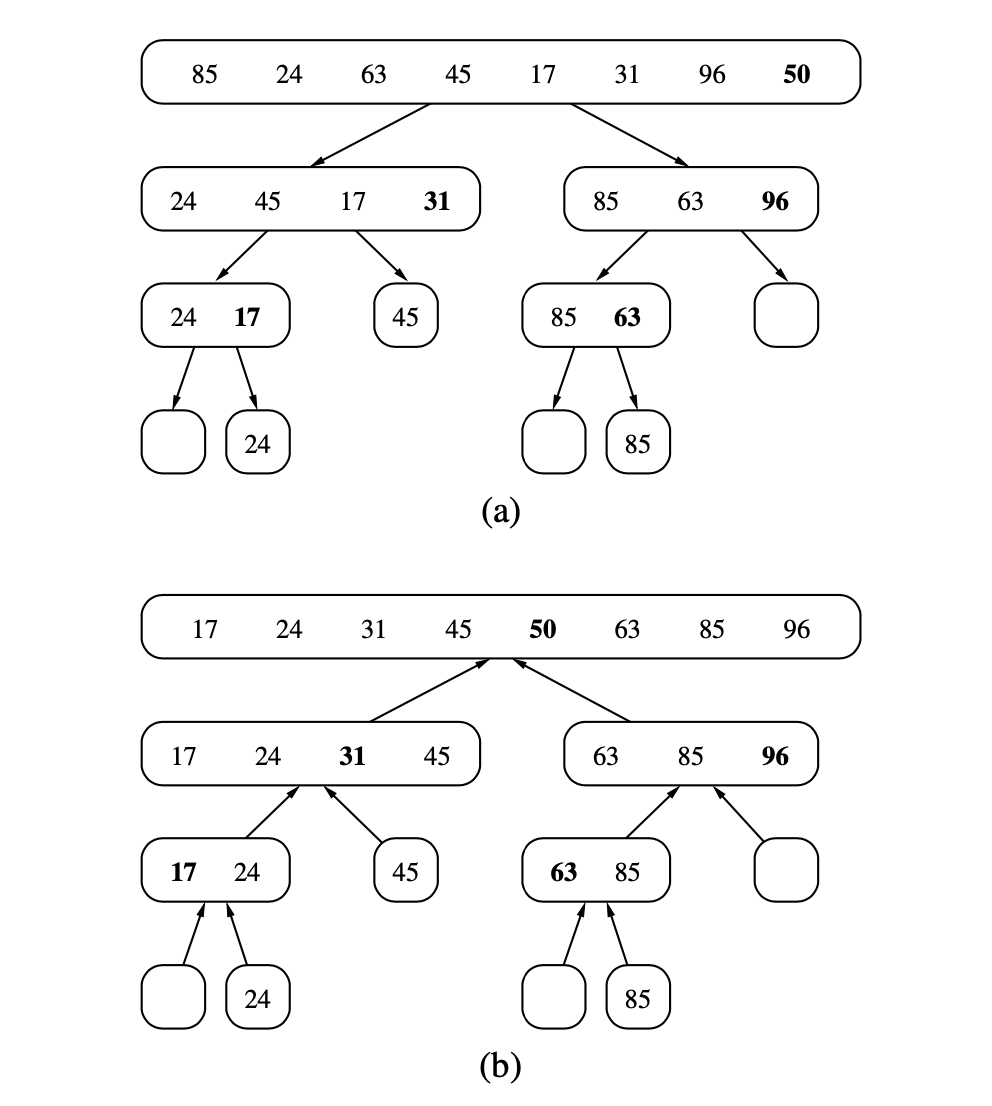

The height of the quick-sort tree is linear in worst case.
    - If the sequence consists of n distinct elements
    - And the sequence is already sorted

In [9]:
def quick_sort(S):
    '''
    Sort the elements of queue S using the quick-sort algorithm
    '''
    n = len(S)
    if n < 2:
        return 
    # divide
    p = S.first()
    L = LinkedQueue()
    E = LinkedQueue()
    G = LinkedQueue()
    while not S.is_empty():
        if S.first() < p:
            L.enqueue(S.dequeue())
        elif S.first() > p:
            G.enqueue(S.dequeue())
        else:
            E.enqueue(S.dequeue())
    # conquer
    quick_sort(L)
    quick_sort(G)
    # conbine
    while not L.is_empty():
        S.enqueue(L.dequeue())
    while not E.is_empty():
        S.enqueue(E.dequeue())
    while not G.is_empty():
        S.enqueue(G.dequeue())

#### Running time of Quick-Sort

1. 最优情况下时间复杂度
    - O(nlogn)

最优情况是每一次取到的元素都刚好平分整个数组，此时的时间复杂度公式为：
    
    T(n) = 2T(n/2) + n

要把整个数组分成两半，需要对所有元素与pivot值进行比较，即n

类似于Merge-Sort，可得T(n) = O(nlogn)


2. 最差情况下时间复杂度
    - O(n^2)
    - 最差情况是每一次取到的元素是数组中最大或最小的，即冒泡排序


3. 平均时间复杂度
    - O(nlogn)
 
 
4. 空间复杂度
    - 最好情况：O(logn)
    - 最坏情况：O(n)
    

### 3.1 Randomized Quick-Sort

#### Picking Pivots at Random

The expected running time of randomized quick-sort on a sequence S of size n is
    - O(nlogn)
    
### 3.2 Additional Optimizations for Quick-Sort

Quick-sort of an array-based sequence can be adapted to be in-place

In [10]:
def inplace_quick_sort(S, a, b):
    '''
    Sort the list from S[a] to S[b] inclusive using the quick-sort
    '''
    if a >= b:
        return
    pivot = S[b]
    left = a
    right = b-1
    while left <= right:
        # scan until reaching value equal or larger than pivot
        while left <= right and S[left] < pivot:
            left += 1
        # scan until reaching value equal or smaller than pivot
        while left <= right and pivot < S[right]:
            right -= 1
        if left <= right:
            S[left], S[right] = S[right], S[left]
            left, right = left + 1, right - 1
    # put pivot into its final place
    S[left], S[b] = S[b], S[left]
    inplace_quick_sort(S, a, left-1)
    inplace_quick_sort(S, left+1, b)

#### Pivot Selection

1. Random pivot
2. Median-of-Three
    - Take the median of (head, middl, tail) as the pivot
    - Lower overhead than random pivot
    
#### Hybrid Approaches

Quick-sort has very good performance on large data sets, but it has rather high overhead on small data sets.

Insertion-sort has good performance on small data sets.

Hybrid Approaches:
    - Divide-and-conquer until the size of a subsequence falls below some threshold(50)
    - Then invoke insertion-sort

## 4. Studying Sorting through an Algorithmic Lens

### 4.1 Lower Bound for Sorting

The running time for any comparison-based algorithm for sorting an n-element sequence is $\Omega (nlogn)$ in the worst-case 

### 4.2 Linear-Time Sorting: Bucket-Sort and Radix-Sort

Require special assumption about the input sequence

#### Bucket-Sort

假设输入数据服从均匀分布，将数据分到有限数量的桶里，每个桶再分别排序（别的排序方法或递归桶排序）

1. 根据数据规模n，划分m个相同大小的区间（即桶），每个桶储存区间内的元素
    - [10, 20)
    
2. 将n个元素按照规定范围划分到各个桶中
3. 对每个桶中的元素进行排序
4. 依次从每个桶中取出元素，放入到最初的输出序列中

总结：
    - 时间代价
        - 当辅助函数为冒泡排序是：O(n) + m O((n/m)^2)
        - 当辅助函数为快速排序是：O(n) + m O(n/m * log(n/m))
    - 通常桶越多，执行效率越快，空间消耗也越大

Algorithm:
    
    bucketSort(S)
       - input
           - Sequence S of entries with integer keys in the range [0, N-1]
       - output
           - Sequence S sorted in nondecreasing order of the keys
       let B be an array of N sequences, each of which is initially empty
       for each entry e in S:
           k = the key of e
           remove e from S and insert it at the end of bucket(sequence) B[k]
       for i = 0 to N - 1 
           for each entry e in sequence B[i]
               remove e from B[i] and insert it at the end of S
               


In [17]:
class node(object):
    '''
    Represent the node in the bucket
    '''
    def __init__(self, val):
        self.val = val
        self.next = None

def bucket_sort(A):
    '''
    A: list [0, 0.39, 0.4, 0.73, 0.56, 0.2, 0.93]
    '''
    buckets = [None] * 10
    for item in A:
        index = int(item // 0.1)
        if buckets[index] == None:
            buckets[index] = node(item)
        else:
            p = buckets[index]
            pre = p
            while p != None and p.val < item:
                pre = p
                p = p.next
            if p == None:
                pre.next = node(item)
            elif pre == p:
                buckets[index] = node(item)
                buckets[index].next = p
            else:
                temp = node(item)
                pre.next = temp
                temp.next = p
    result = []
    for head in buckets:
        while head != None:
            result.append(head.val)
            head = head.next
    return result

A = [0, 0.39, 0.4, 0.73, 0.56, 0.2, 0.93, 0.32, 0.47, 0.25]
print(bucket_sort(A))              

[0, 0.2, 0.25, 0.32, 0.39, 0.4, 0.47, 0.56, 0.73, 0.93]


#### Stable Sorting 稳定性

For two entries with same key, their order stay the same after sorting

指待排序的序列中有两元素相等，排序后它们的先后顺序不变

#### Radix-Sort

Lexicographic Order:
    - (k1,l1) < (k2,l2) if k1 < k2
    - Or if k1 = k2 and l1 < l2


Radix-Sort sorts a sequence S of entries with keys that are pairs, by applying a stable bucket-sort on the sequence twice
    - First using the second component to sort
    - Then using the first component to sort
To sort the sequence S lexicographically

## 5. Comparing Sorting Algorithm

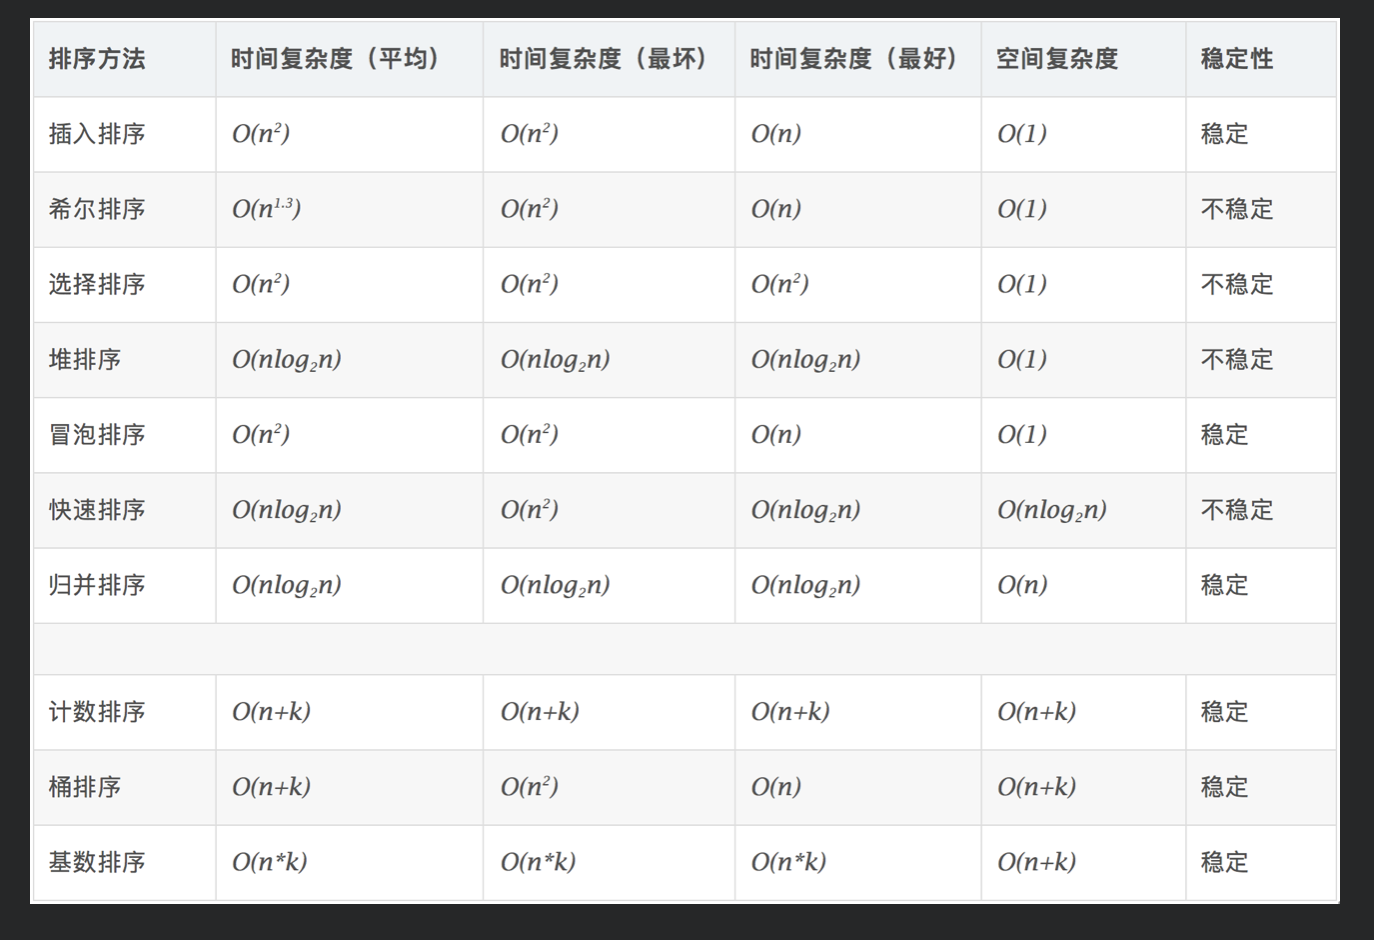



#### Insertion-Sort

If implemented well, the running time is O(n + m)
    - Where m is the number of inversions(the number of pairs of elements out of order)
    
Excellent for 
1. Sorting small sequences
    - < 50
3. Sequences almost sorted
    
    
#### Heap-Sort

Advantages:
    - Easily in=place
    - Optimal for small- and medium-sized sequences
Disadvantages:
    - On larger sequences quick-sort and merge-sort perform better
    - Not stable
    
#### Quick-Sort

Default choice for a general-purpose, in-memory sorting algorithm


#### Merge-Sort

Advantages:
    - Excellent where the input is stratified across various levels of the computer's memory hierarchy
        - cache, main memory, external memory
        - Reducing the total number of memory transfers
Disadvantages:
    - Difficult in-place
    
#### Bucket-Sort and Radix-Sort

Sorting entries with small integer keys, character string, or d-tuples of keys from a discrete range.


## 6. Python's Built-In Sorting Functions

Python provides two built-in ways to sort data.

1. The sort method of the list class

In [19]:
colors = ['red','green','blue','cyan','magenta','yellow']
colors.sort()
print(colors)

['blue', 'cyan', 'green', 'magenta', 'red', 'yellow']


2. The sorted function
    - Produce a new ordered list containing the elements in order
    - Can be applied to any iterable object as a parameter

In [20]:
colors = ['red','green','blue','cyan','magenta','yellow']
new = sorted(colors)
print(new)
print(colors)

['blue', 'cyan', 'green', 'magenta', 'red', 'yellow']
['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']


### 6.1 Sorting According to a Key Function

Both of Python's built-in sort functions allow a caller to control the notion of order that is used when sorting.
    - Providing an optional parameter, a reference to a secondary function that computes a key for each element of the primary sequence
    - A key function is a one-parameter function that accepts an element and returns a key

In [21]:
colors = ['red','green','blue','cyan','magenta','yellow']
colors.sort(key=len)
print(colors)

['red', 'blue', 'cyan', 'green', 'yellow', 'magenta']


In [22]:
colors = ['red','green','blue','cyan','magenta','yellow']
colors.sort(key=len, reverse = True)
print(colors)

['magenta', 'yellow', 'green', 'blue', 'cyan', 'red']


#### Decorate-Sort-Undecorate Design Pattern

Python's support for a key function when sorting is implemented using the **Decorate-Sort-Undecorate Design Pattern**

1. Each element of the list is temporarily replaced with a decorated version that includes the result of the key function applied to the element

2. The list is sorted based upon the natural order of the keys

3. The decorated elements are replaced by the original elements

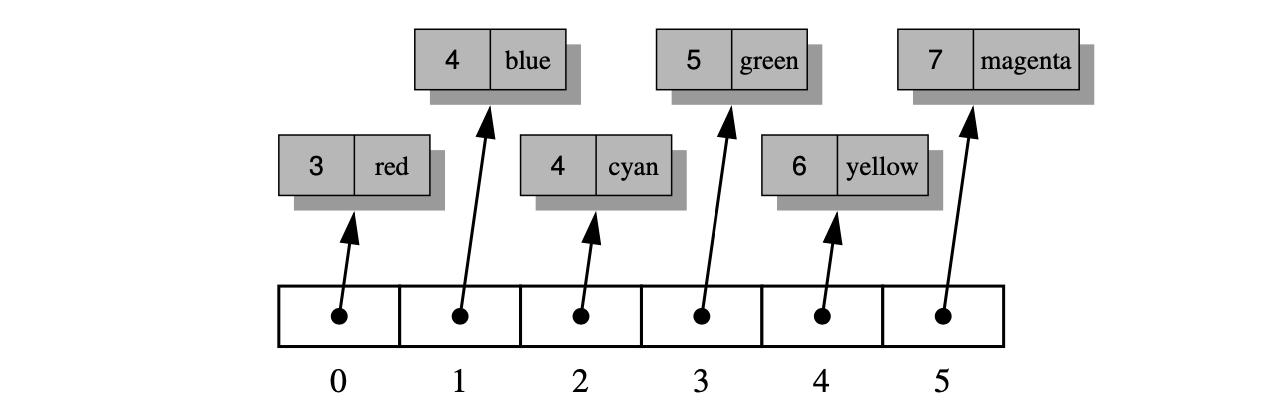

In [23]:
def decorated_merge_sort(data, key = None):
    '''
    Demonstration of the decorate-sort-undecorate pattern
    '''
    if key is not None:
        for j in range(len(data)):
            # decorate each element
            data[j] = _Item(key(data[j]), data[j])
    merge_sort(data)
    if key is not None:
        for j in range(len(data)):
            # undecorate
            data[j] = data[j]._value

## 7. Selection

**Order statistics:**
    - Queries that ask for an element with a given rank
    
**Selection Problem:**
    - The general order statistic problem of selecting the k^th smallest element from an unsorted collection of n comparable element.
    - Sorting then indexing using O(nlogn) in the best case
        Not good when k = 1,2 or k = n-1, etc

### 7.1 Prune-and-Search

Solve the selection problem in O(n) for any value of k.


A design pattern that usually has three steps:

1. Pruning away a fraction of n objects and recursively solving the smaller problem
2. When reduced the problem to one defined on a constant-sized collection of objects, using brute-force method
3. Returning back from all the recursive calls

### 7.2 Randomized Quick-Select

This algorithm runs in O(n) **expected** time

In [24]:
def quick_select(S, k):
    '''
    Return the kth smallest element of list S, for k from 1 to len(S)
    '''
    if len(S) == 1:
        return S[0]
    # pick random pivot element from S
    pivot = random.choice(S)
    L = [x for x in S if x < pivot]
    E = [x for x in S if x == pivot]
    G = [x for x in S if x > pivot]
    if k <= len(L):
        return quick_select(L, k)
    elif k <= len(L) + len(E):
        return pivot
    else:
        j = k - len(L) - len(E)
        return quick_select(G, j)

### 7.3 Analyzing Randomized Quick-Select